In [1]:
import numpy as np 
import scanpy as sc 
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import seaborn as sns 
import anndata as ad 
import scanpy.external as sce 

def count_summary(neuron, key_1 , key_2 = 'samples'):
        anno_df = neuron.obs.copy()
        anno_df.head()

        df = anno_df 
        # 1. 按col1和col2分组，统计每个组合的数量
        grouped = df.groupby([key_1, key_2]).size().reset_index(name='count')

        # 2. 按col1分组，计算总数
        total_counts = df.groupby(key_2).size().reset_index(name='total_count')

        # 3. 合并数据，计算比例
        merged = grouped.merge(total_counts, on=key_2)
        merged['proportion'] = merged['count'] #/ merged['total_count']

        # 4. 重新排序和格式化结果
        result = merged[[key_2, key_1, 'proportion']]

        result = result.pivot(index=key_1, columns=key_2, values='proportion')
        return result


In [75]:
"""
import scanpy.external as sce 

sce.pp.harmony_integrate(scdata, 
                         key = ['species'],
                         max_iter_harmony = 20, 
                         sigma = 0.1, 
                         random_state = 0,
                         theta =2)

sc.pp.neighbors(scdata, use_rep = 'X_pca_harmony')
sc.tl.umap(scdata)
sc.pl.umap(scdata, color = ['species', 'eco', 'new_anno'])
"""

"\nimport scanpy.external as sce \n\nsce.pp.harmony_integrate(scdata, \n                         key = ['species'],\n                         max_iter_harmony = 20, \n                         sigma = 0.1, \n                         random_state = 0,\n                         theta =2)\n\nsc.pp.neighbors(scdata, use_rep = 'X_pca_harmony')\nsc.tl.umap(scdata)\nsc.pl.umap(scdata, color = ['species', 'eco', 'new_anno'])\n"

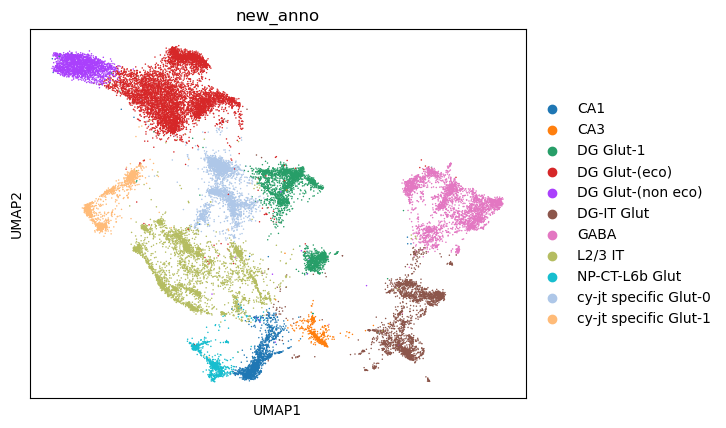

In [2]:
scdata = sc.read_h5ad('final_hvg.h5ad')
sc.pl.umap(scdata, color = 'new_anno')

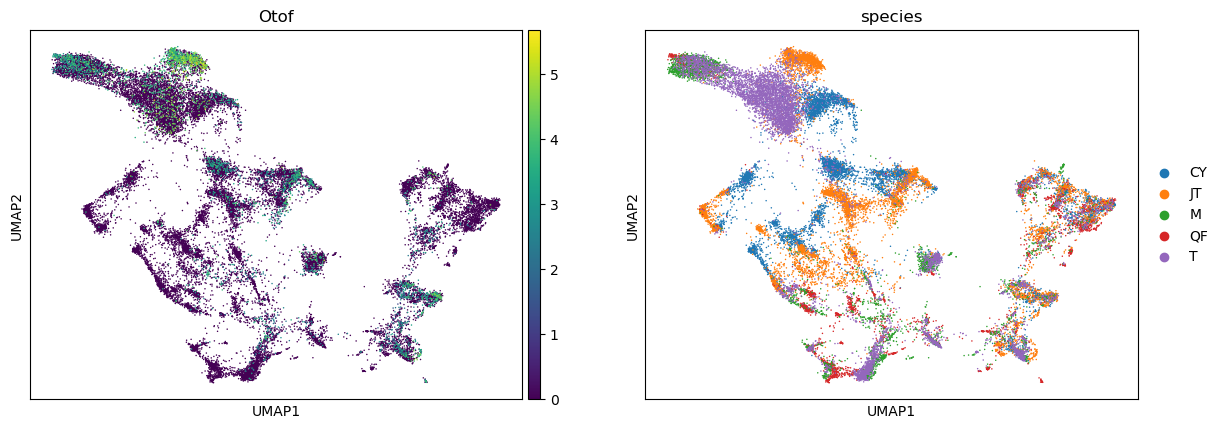

In [5]:
sc.pl.umap(scdata, color = ['Otof','species'])